#***Email Phishing Data***
##Muhammad Furqan Rauf

##***Pre-Processing***



###Loadng the dataset

In [ ]:
import pandas as pd

df = pd.read_csv('email_phishing_dataset.csv')
df.head()


,num_words,num_unique_words,num_stopwords,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,5.0,5,1,0.0,0,0,0.0,0,0
1,757.0,315,287,0.0,0,0,27.0,0,0
2,117.0,80,40,0.0,0,0,11.0,0,1
3,27.0,24,9,0.0,0,0,2.0,0,1
4,483.0,247,175,6.0,3,1,17.0,0,1


In [ ]:
# Step 2: Check for Missing Values
print("\n Missing values before imputation:")
print(df.isnull().sum())


 Missing values before imputation:
num_words              100
num_unique_words         0
num_stopwords            0
num_links              100
num_unique_domains       0
num_email_addresses      0
num_spelling_errors    100
num_urgent_keywords      0
label                    0
dtype: int64


In [ ]:
# Step 3: Handle Missing Values (using Mean Imputation)
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\n✅ Missing values after mean imputation:")
print(df.isnull().sum())


✅ Missing values after mean imputation:
num_words              0
num_unique_words       0
num_stopwords          0
num_links              0
num_unique_domains     0
num_email_addresses    0
num_spelling_errors    0
num_urgent_keywords    0
label                  0
dtype: int64


In [ ]:
# Step 4: Identify Categorical Features (there should be none)
print("\n📊 Data types and unique value counts:")
print(df.dtypes)
print("\n🔎 Unique values per column:")
print(df.nunique())


📊 Data types and unique value counts:
num_words              float64
num_unique_words         int64
num_stopwords            int64
num_links              float64
num_unique_domains       int64
num_email_addresses      int64
num_spelling_errors    float64
num_urgent_keywords      int64
label                    int64
dtype: object

🔎 Unique values per column:
num_words              1358
num_unique_words        754
num_stopwords           657
num_links                63
num_unique_domains       25
num_email_addresses      81
num_spelling_errors     310
num_urgent_keywords       7
label                     2
dtype: int64


In [ ]:
# Since all features are numeric, encoding is not required
print("\nℹ️ No categorical features detected, so encoding is skipped.")


ℹ️ No categorical features detected, so encoding is skipped.


In [ ]:
# Step 5: Feature Selection - Remove features with low correlation to label
correlation = df.corr()['label'].sort_values()
print("\n📈 Feature correlation with label:")
print(correlation)



📈 Feature correlation with label:
num_email_addresses   -0.114702
num_links             -0.061571
num_spelling_errors   -0.040955
num_words             -0.018175
num_unique_domains    -0.015721
num_stopwords         -0.006113
num_unique_words       0.016053
num_urgent_keywords    0.072592
label                  1.000000
Name: label, dtype: float64


In [ ]:
# Example: Drop features with correlation < 0.01 (you can change the threshold)
low_corr_features = correlation[abs(correlation) < 0.01].index.tolist()
df.drop(columns=low_corr_features, inplace=True)
print(f"\n Removed low-correlation features: {low_corr_features}")

print("\n✅ Final dataset shape after feature selection:", df.shape)
print("\n📄 Remaining columns:", df.columns.tolist())


 Removed low-correlation features: ['num_stopwords']

✅ Final dataset shape after feature selection: (13898, 8)

📄 Remaining columns: ['num_words', 'num_unique_words', 'num_links', 'num_unique_domains', 'num_email_addresses', 'num_spelling_errors', 'num_urgent_keywords', 'label']


In [ ]:
df.head()

,num_words,num_unique_words,num_links,num_unique_domains,num_email_addresses,num_spelling_errors,num_urgent_keywords,label
0,5.0,5,0.0,0,0,0.0,0,0
1,757.0,315,0.0,0,0,27.0,0,0
2,117.0,80,0.0,0,0,11.0,0,1
3,27.0,24,0.0,0,0,2.0,0,1
4,483.0,247,6.0,3,1,17.0,0,1


###**Data Preprocessing Report**
* Loaded the balanced dataset with equal phishing and non-phishing emails.

* Handled missing values using mean imputation — since all features are numeric and continuous, mean was the most appropriate and simple method.

* Checked for categorical features, but none were found — so no encoding was needed.

* Performed feature selection by removing features with very low correlation to the target (label). This helps reduce noise and focus on stronger predictors.

#***Feature Engineering***

In [ ]:
# Feature 1: Word Density
df['word_density'] = df['num_words'] / (df['num_unique_words'] + 1)  # +1 to avoid division by zero

In [ ]:
# Feature 2: Suspicious Score
df['suspicious_score'] = (
    df['num_spelling_errors'] +
    df['num_urgent_keywords'] +
    df['num_links']
)

In [ ]:
# Show sample rows with new features
print("✅ Sample with new features:")
print(df[['num_words', 'num_unique_words', 'word_density',
          'num_spelling_errors', 'num_urgent_keywords',
          'num_links', 'suspicious_score']].head())

✅ Sample with new features:
   num_words  num_unique_words  word_density  num_spelling_errors  \
0        5.0                 5      0.833333                  0.0   
1      757.0               315      2.395570                 27.0   
2      117.0                80      1.444444                 11.0   
3       27.0                24      1.080000                  2.0   
4      483.0               247      1.947581                 17.0   

   num_urgent_keywords  num_links  suspicious_score  
0                    0        0.0               0.0  
1                    0        0.0              27.0  
2                    0        0.0              11.0  
3                    0        0.0               2.0  
4                    0        6.0              23.0  


## **Feature Engineering Report**
We added two new features to improve model performance:

* word_density = num_words / num_unique_words

Helps identify repetitive, unnatural language often seen in phishing.

* suspicious_score = num_spelling_errors + num_urgent_keywords + num_links

Combines common phishing indicators into one score.

#***Feature Scaling and Visualization***

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drop the label column before scaling
features = df.drop(columns=['label'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['label'] = df['label']  # Reattach label

print("✅ Scaled feature sample:")
print(scaled_df.head())

✅ Scaled feature sample:
   num_words  num_unique_words  num_links  num_unique_domains  \
0  -0.404825         -0.744142  -0.168684           -0.240099   
1   0.800964          1.167121  -0.168684           -0.240099   
2  -0.225239         -0.281739  -0.168684           -0.240099   
3  -0.369549         -0.627000  -0.168684           -0.240099   
4   0.361621          0.747876   1.338281            1.937556   

   num_email_addresses  num_spelling_errors  num_urgent_keywords  \
0            -0.136214            -0.381803            -0.460823   
1            -0.136214             0.099279            -0.460823   
2            -0.136214            -0.185806            -0.460823   
3            -0.136214            -0.346167            -0.460823   
4            -0.014283            -0.078899            -0.460823   

   word_density  suspicious_score  label  
0     -0.716454         -0.384562      0  
1      0.788541          0.079213      0  
2     -0.127734         -0.195617      1  
3  

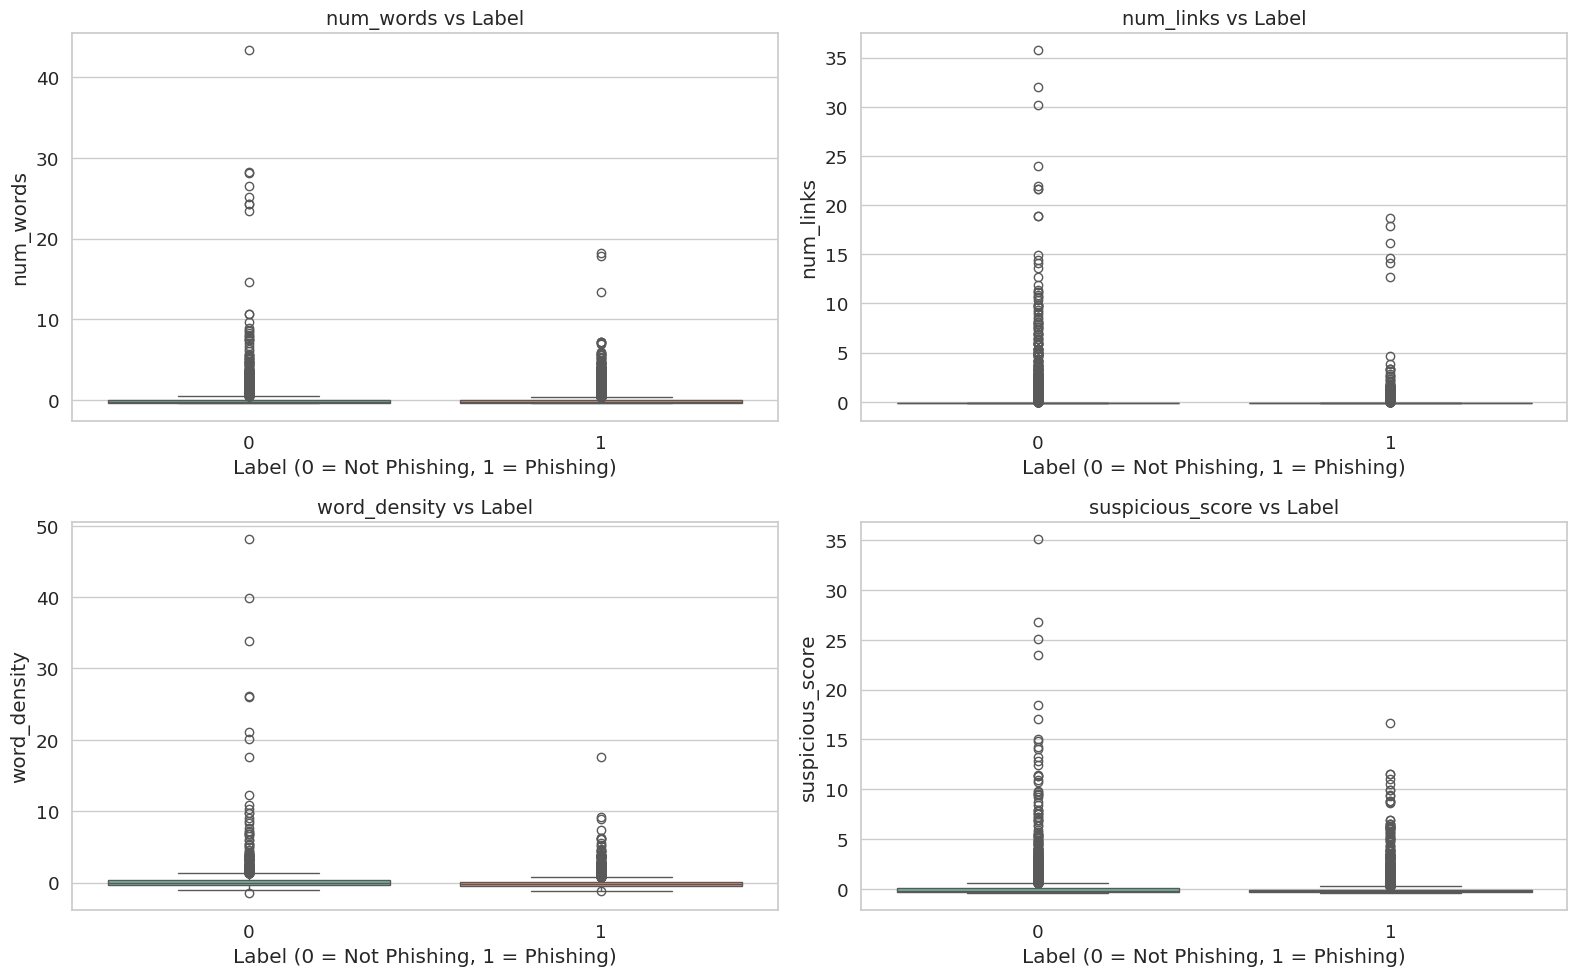

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a clean Seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Selected features to plot
selected_features = ['num_words', 'num_links', 'word_density', 'suspicious_score']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=scaled_df, x='label', y=feature, hue='label', palette="Set2", showfliers=True)
    plt.title(f'{feature} vs Label', fontsize=14)
    plt.xlabel('Label (0 = Not Phishing, 1 = Phishing)')
    plt.ylabel(feature)
    plt.legend([],[], frameon=False)  # Remove legend for simplicity

plt.tight_layout()
plt.show()


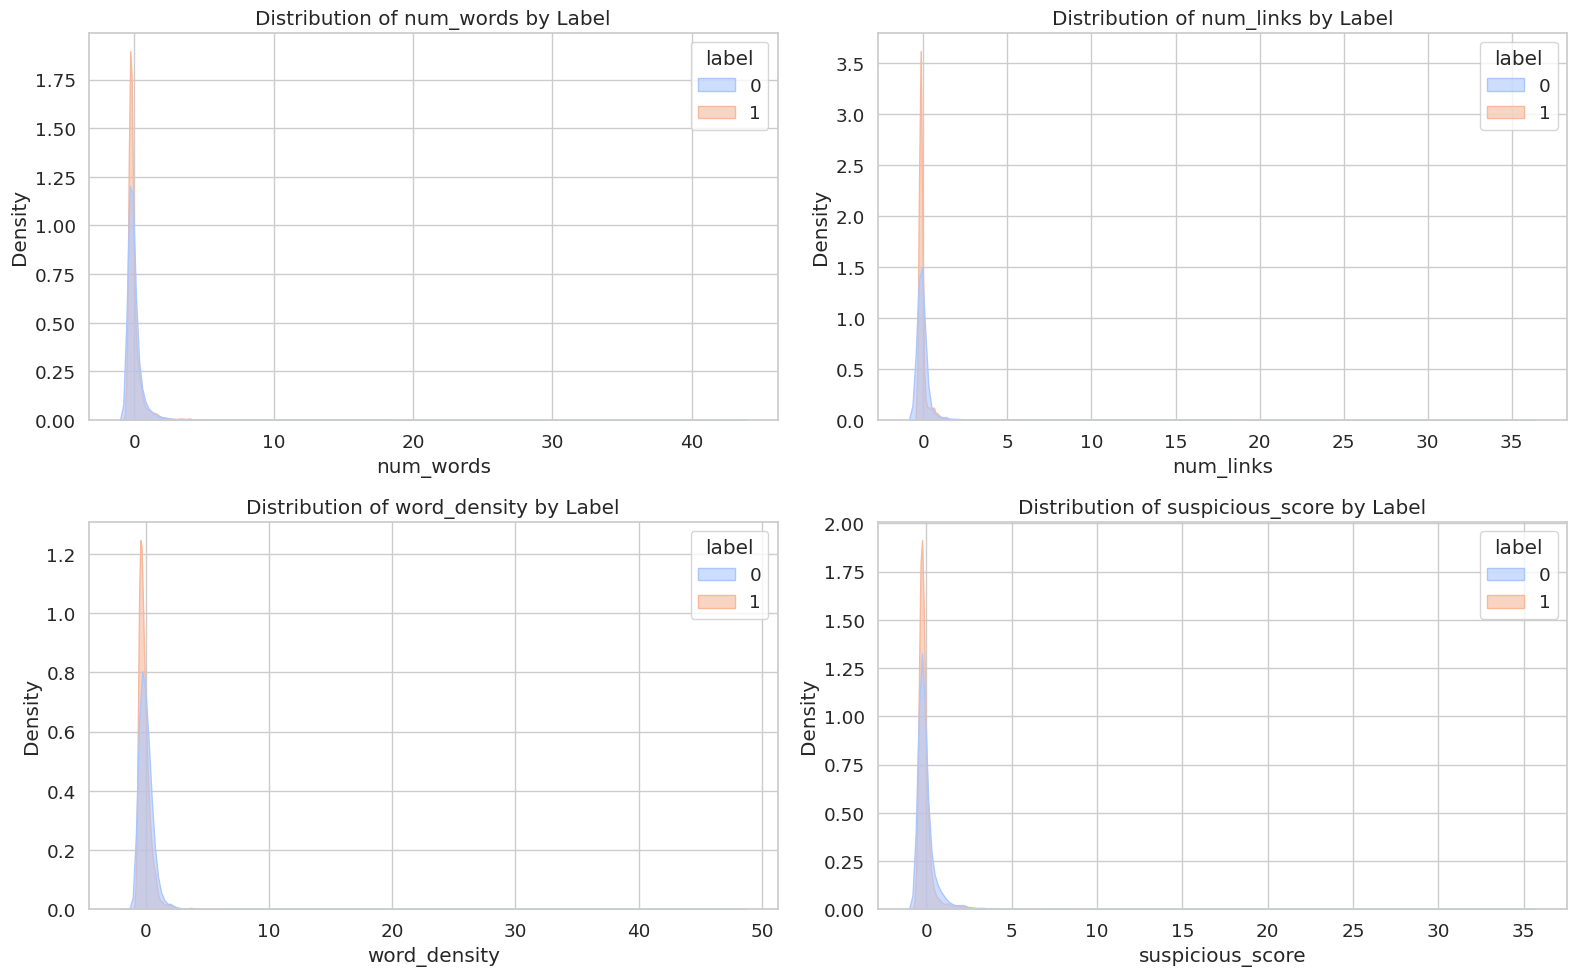

In [ ]:
# Distribution comparison by label
plt.figure(figsize=(16, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(data=scaled_df, x=feature, hue='label', fill=True, common_norm=False, palette="coolwarm", alpha=0.6)
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


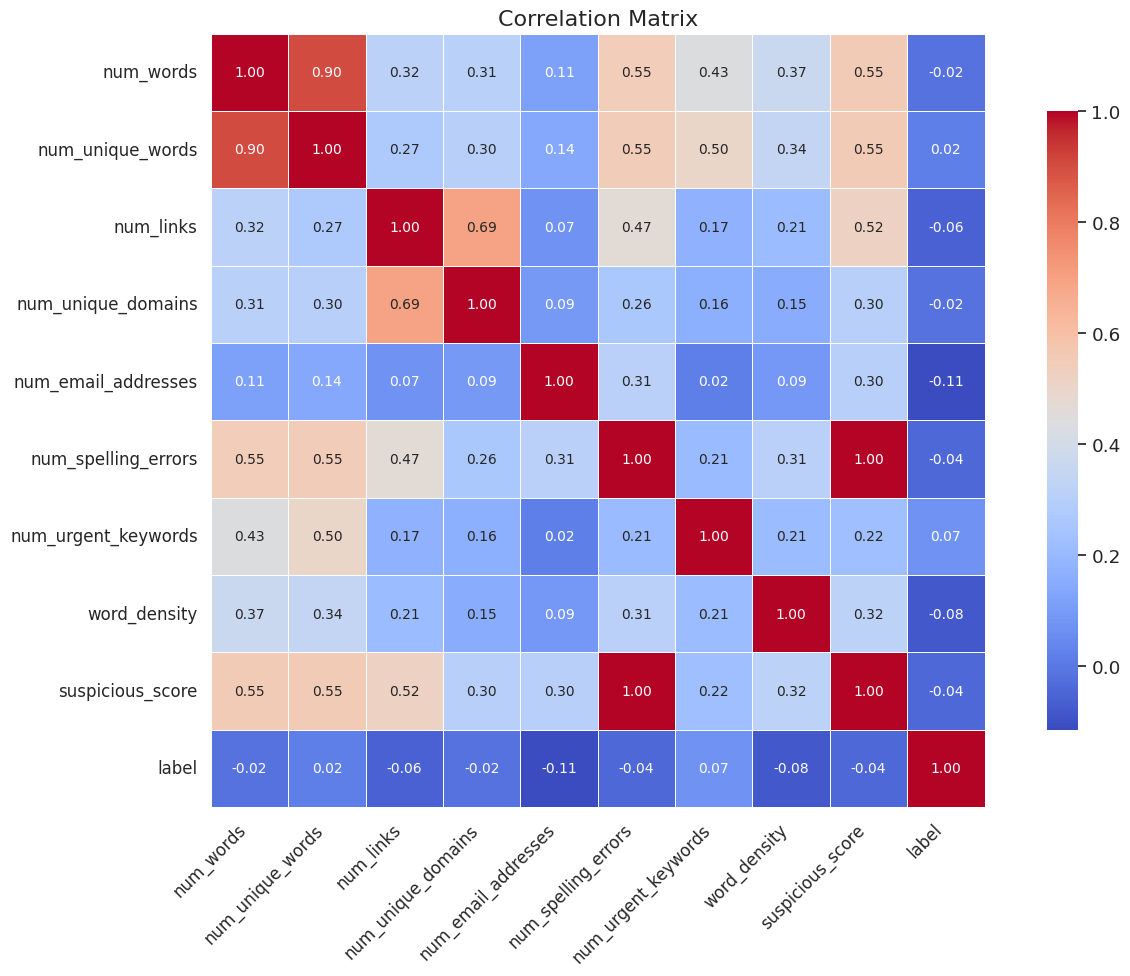

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations
corr = scaled_df.corr()

# Set up the figure and axes
plt.figure(figsize=(14, 10))  # Adjust size as needed
ax = sns.heatmap(
    corr,
    cmap="coolwarm",  # Choose a colormap
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 10},  # Adjust annotation font size
    cbar_kws={"shrink": 0.8},  # Adjust colorbar size
    square=True,  # Make cells square for better aspect ratio
)

# Customize the plot
plt.title("Correlation Matrix", fontsize=16)  # Adjust title font size
plt.xticks(rotation=45, ha="right", fontsize=12)  # Rotate x-axis labels
plt.yticks(fontsize=12)  # Adjust y-axis label font size

# Improve layout and spacing
plt.tight_layout()

# Display the heatmap
plt.show()

###**Feature Scaling and Visualization Report**
I standardized all numerical features to ensure models performed optimally. Then, boxplots were created to inspect distributions and outliers, and visual correlations were also plotted to understand feature-target relationships.

#***Model Training and Evaluation***

### Split the Dataset (80/20 split)

In [ ]:
from sklearn.model_selection import train_test_split

# Features and label
X = scaled_df.drop('label', axis=1)
y = scaled_df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


### Train the Models: Logistic Regression & SVM

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Initialize models
logreg = LogisticRegression()
svm = SVC(kernel='linear', probability=True)

# Train them
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)


SVC(kernel='linear', probability=True)

### Evaluation Metrics



Logistic Regression Evaluation
------------------------------
Accuracy     : 0.6424
Precision    : 0.5957
Recall       : 0.8871
F1 Score     : 0.7127




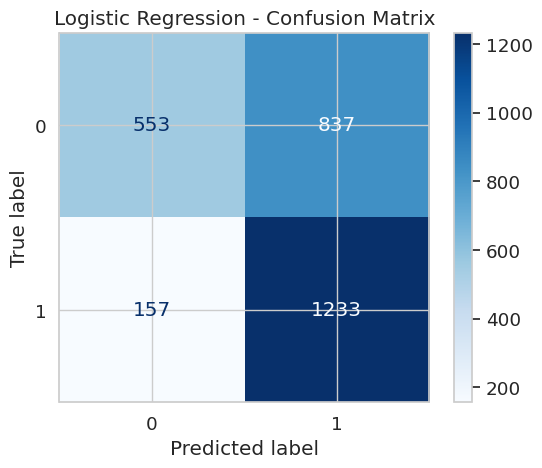



Support Vector Machine Evaluation
------------------------------
Accuracy     : 0.6140
Precision    : 0.5694
Recall       : 0.9353
F1 Score     : 0.7079




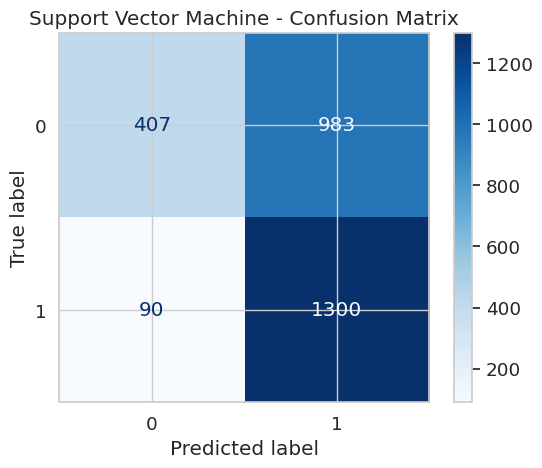

Model Comparison Summary


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.642446,0.595652,0.887050,0.712717
1,Support Vector Machine,0.614029,0.569426,0.935252,0.707868


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay)

# For storing evaluation results
results = []

def evaluate_model(model, X_test, y_test, model_name):
    # Predictions & probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append to results list
    results.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
    })

    # Print report
    print()
    print()
    print(f"{model_name} Evaluation")
    print("-" * 30)
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print()
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# Run evaluation
evaluate_model(logreg, X_test, y_test, "Logistic Regression")
evaluate_model(svm, X_test, y_test, "Support Vector Machine")

# Summary Table
results_df = pd.DataFrame(results)
print("Model Comparison Summary")
display(results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True))


##**Model Training & Evaluation Report**
We trained two models:

* Logistic Regression

* Support Vector Machine (SVM)

Both were evaluated using:

* Accuracy, Precision, Recall, and F1 Score.

* Confusion Matrix and ROC Curve Visuals

##**Model Comparison:**

* **Logistic Regression:** Higher accuracy and precision.
* **SVM:** Higher recall and F1-score.

###**Strengths & Weaknesses:**
* Logistic Regression: Accurate and precise, but may miss some phishing emails.
* SVM: Catches more phishing emails (higher recall), but slightly lower accuracy and precision.

###**Conclusion:**
Despite lower accuracy, SVM is slightly preferred for phishing detection due to its higher recall and F1-score. Catching more phishing emails is critical, even with a few more false positives.